# Intuit Quickbooks Upgrade

* Team-lead GitLab userid:
* Group name:
* Team member names:

## Setup

Please complete this python notebook with your group by answering the questions in `intuit.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the first group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import os
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from pyrsm import profit_max, confusion, profit_plot, gains_plot, lift_plot, ROME_plot
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-

In [4]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

      index     OR       OR%   2.5%  97.5%
1   numords  1.352   35.224%  1.313  1.392
2  version1  2.113  111.278%  1.911  2.335
3  upgraded  2.628  162.846%  2.388  2.894


In [5]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [6]:
mpl.rcParams["figure.dpi"] = 150

In [7]:
intuit75k.describe()

,id,zip_bins,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,training,res1_yes
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000
mean,37500.500000,10.498333,0.245080,2.076280,93.087133,15.838427,15.657173,0.21400,0.028693,0.208387,0.700000,0.048013
std,21650.779432,5.765751,0.430137,1.241355,81.205900,9.539057,10.026312,0.41013,0.166944,0.406157,0.458261,0.213796
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,18750.750000,5.000000,0.000000,1.000000,37.000000,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,37500.500000,10.000000,0.000000,2.000000,71.000000,15.000000,14.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,56250.250000,15.000000,0.000000,3.000000,124.500000,24.000000,24.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,75000.000000,20.000000,1.000000,5.000000,1149.000000,36.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

We shall first convert our categorical variables to 0 or 1 values for ease of use in the Logistic regression.

In [8]:
# Converting 1/0 variables to categorical
intuit75k["zip_bins"] = pd.Categorical(intuit75k["zip_bins"])
intuit75k["id"] = pd.Categorical(intuit75k["id"])

In [1]:
# Checking correlations
intuit75k[['numords', 'dollars', 'last', 'sincepurch']].corr()

NameError: name 'intuit75k' is not defined

A closer look at the correlation matrix shows us that there nothing to be overly concerned about.

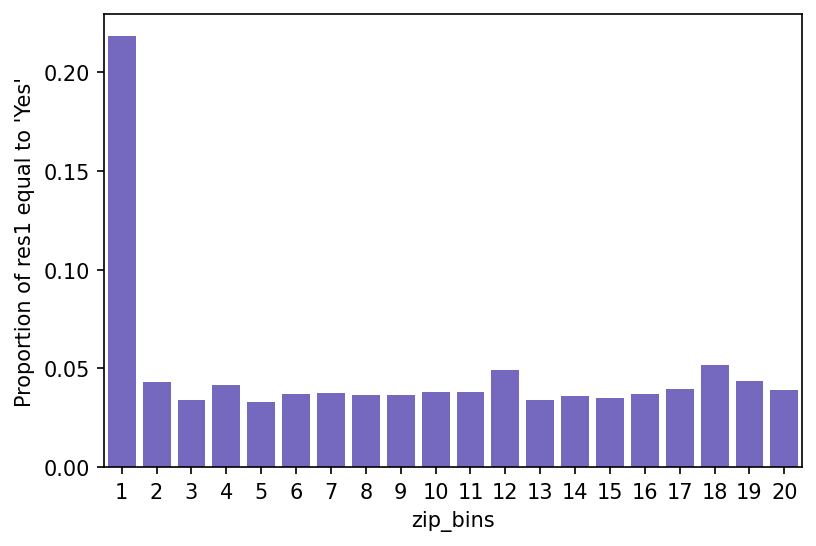

In [10]:
# proportion of people who responded positively across every zip code bin
fig = rsm.prop_plot(intuit75k, "zip_bins", "res1", "Yes")

In [11]:
intuit75k['responsive_bin'] = np.where(intuit75k['zip_bins'] == 1, 'Res_ZIP_bin', 'NRes_ZIP_bin')

There response rate in zip_bin 1 is extremely high compared to the response rates of the other bins. The other bins have similar response rates. This motivates us to create another variable/feature which just captures whether it's zip bin 1 or not. We name it responsive_bin.

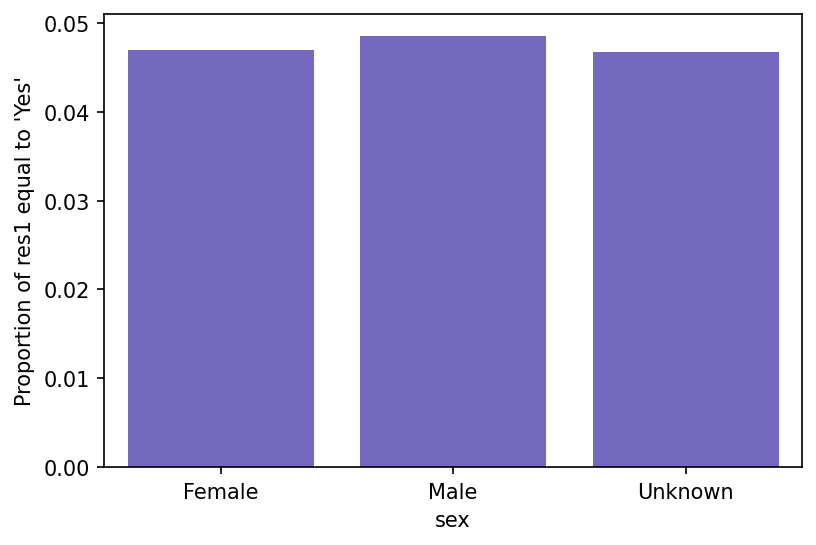

In [12]:
# proportion of people who responded positively across every sex
fig = rsm.prop_plot(intuit75k, "sex", "res1", "Yes")

There seems no relationship between the sex and response rate.

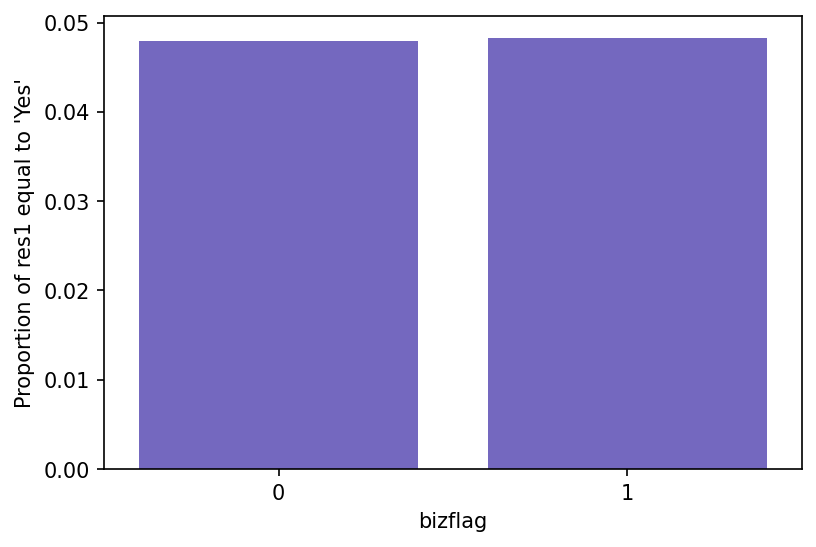

In [13]:
# proportion of people who responded positively across bizflag
fig = rsm.prop_plot(intuit75k, "bizflag", "res1", "Yes")

There seems no relationship between the if the address has a business address or not and the response rate.

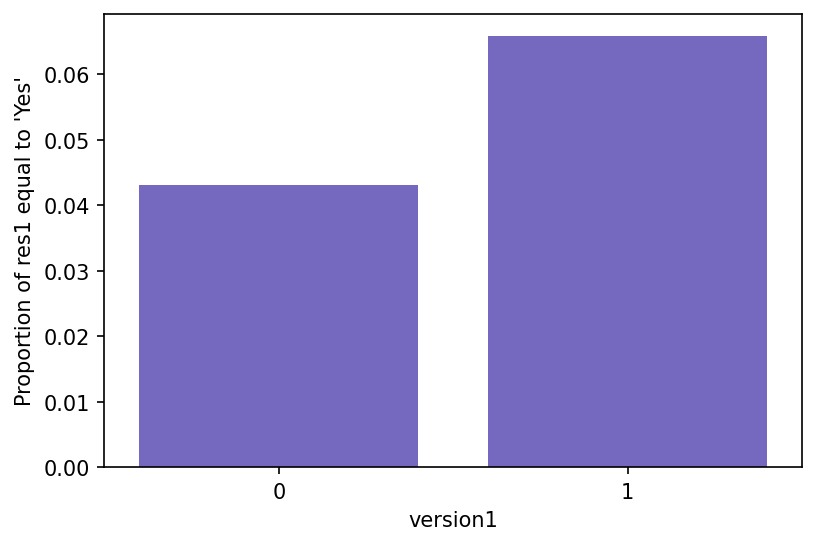

In [14]:
# proportion of people who responded positively across 'version1'
fig = rsm.prop_plot(intuit75k, "version1", "res1", "Yes")

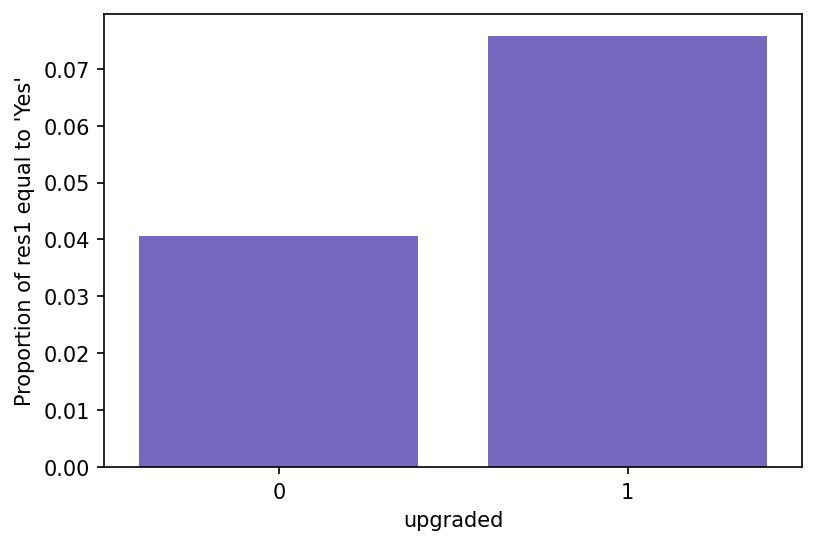

In [15]:
fig = rsm.prop_plot(intuit75k, "upgraded", "res1", "Yes")

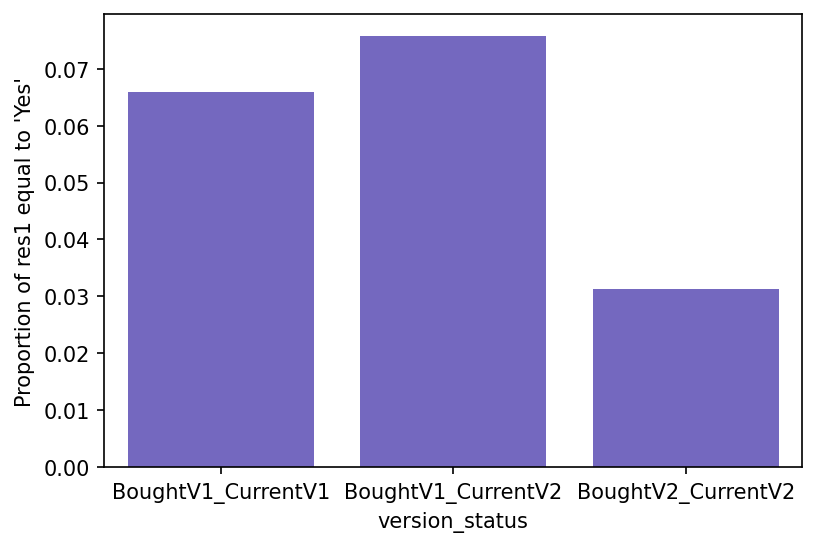

In [16]:
def make_version_status(x, y):
    if x == 1 and y == 0:
        return "BoughtV1_CurrentV1"
    if x == 0 and y == 1:
        return "BoughtV1_CurrentV2"
    if x == 0 and y == 0:
        return "BoughtV2_CurrentV2"


intuit75k["version_status"] = intuit75k[["version1", "upgraded"]].apply(
    lambda x: make_version_status(*x), axis=1
)

fig = rsm.prop_plot(intuit75k, "version_status", "res1", "Yes")

- We think version1 and upgraded are intuitively interrelated and can be combined into a new variable/feature which we call version_status.
- Version_status shows significant differences with the response rate.


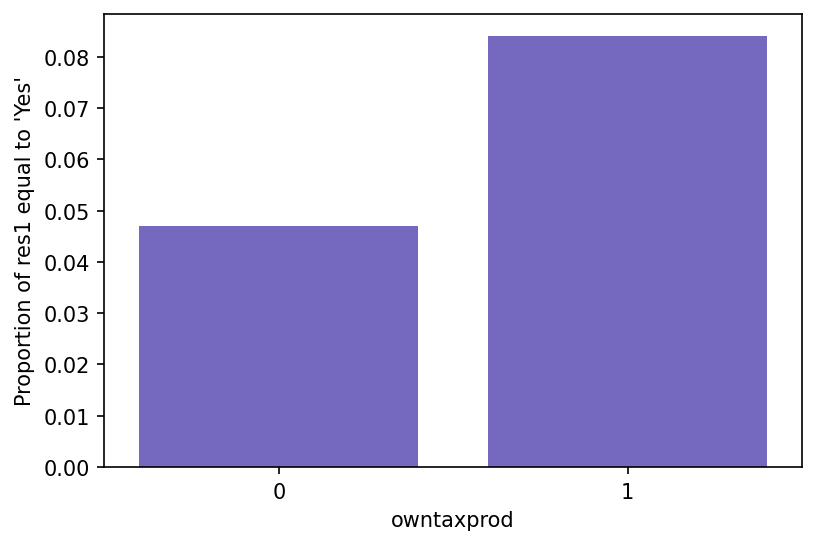

In [17]:
# proportion of people who responded positively across owntaxprod
fig = rsm.prop_plot(intuit75k, "owntaxprod", "res1", "Yes")

Businesses owning a tax product tends to respond more. 

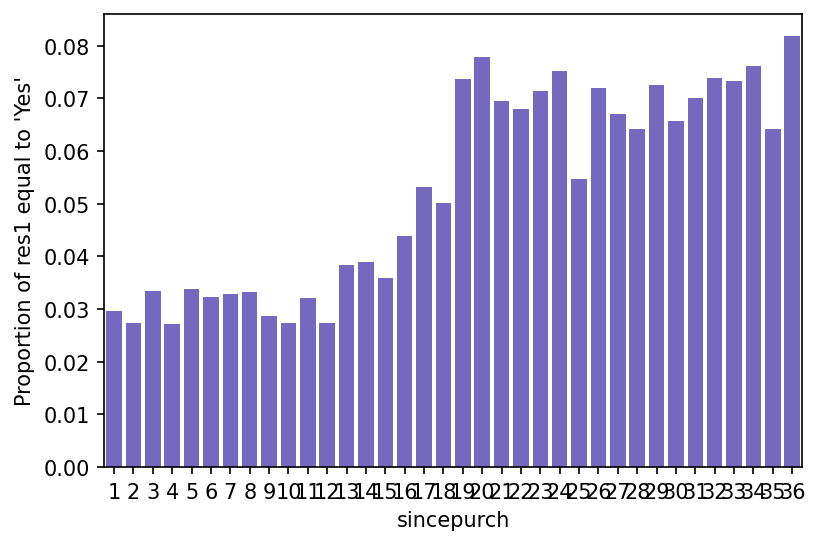

In [18]:
# proportion of people who responded positively across upgraded
fig = rsm.prop_plot(intuit75k, "sincepurch", "res1", "Yes")

Sincepurch has a clear pattern with response rate. As the variable increases the response rate also increases.

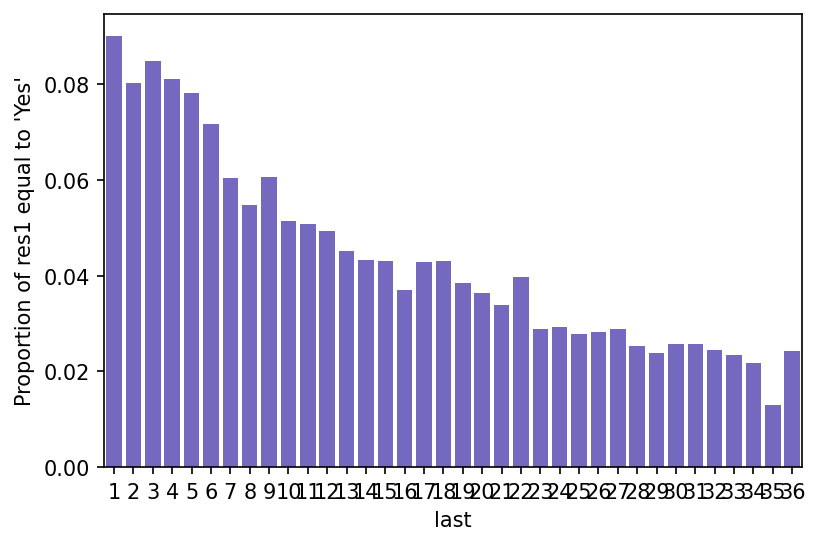

In [19]:
fig = rsm.prop_plot(intuit75k, "last", "res1", "Yes")

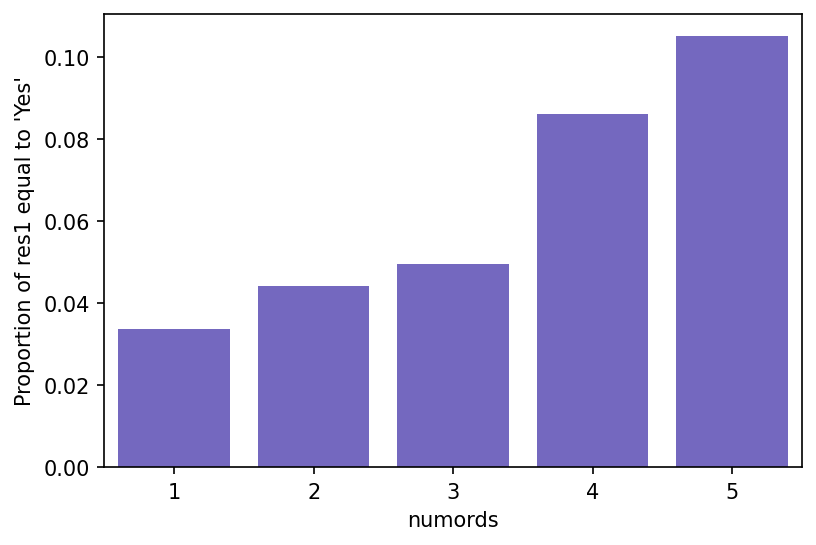

In [20]:
fig = rsm.prop_plot(intuit75k, "numords", "res1", "Yes")

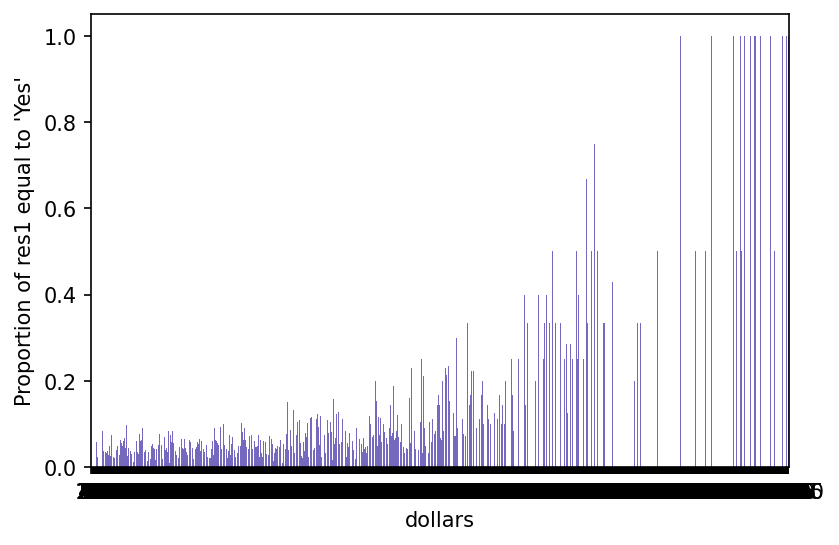

In [21]:
fig = rsm.prop_plot(intuit75k, "dollars", "res1", "Yes")

As expected last(recency), numords(frequency), and dollars(monetary) variables have a strong pattern with the response rate. 

# RFM Analysis

For our RFM models, we need to create RFM bins for IQ and SQ. For IQ, we have grouped by recency, frequency and monetary variables independently whereas for SQ we first group by Recency then Frequency followed by Monetary

In [6]:
##RFM Independent Bins
intuit75k = intuit75k.assign(rec_iq=rsm.xtile(intuit75k["last"], 5))
intuit75k = intuit75k.assign(freq_iq=rsm.xtile(intuit75k["numords"], 5, rev=True))
intuit75k = intuit75k.assign(mon_iq=rsm.xtile(intuit75k["dollars"], 5, True))
intuit75k = intuit75k.assign(
    rfm_iq=intuit75k["rec_iq"].astype(str)
    + intuit75k["freq_iq"].astype(str)
    + intuit75k["mon_iq"].astype(str)
)

In [7]:
#RFM Sequential Bins
intuit75k = intuit75k.assign(freq_sq=intuit75k.groupby("rec_iq")["numords"].transform(rsm.xtile, 5, rev=True))
intuit75k = intuit75k.assign(mon_sq=intuit75k.groupby(["rec_iq", "freq_sq"])["dollars"].transform(rsm.xtile, 5, rev=True))
intuit75k = intuit75k.assign(
    rfm_sq=intuit75k["rec_iq"].astype(str)
    + intuit75k["freq_sq"].astype(str)
    + intuit75k["mon_sq"].astype(str)
)

In [8]:
##Creating Training and test dataset
intuit_training= intuit75k[intuit75k['training']==1].reset_index()
intuit_test= intuit75k[intuit75k['training']==0].reset_index()

In [9]:
#Calculating Response rates
intuit_training['res1_yes'].agg(n_mails= "count",n_responders=sum)

n_mails         52500
n_responders     2498
Name: res1_yes, dtype: int64

In [10]:
#Overall Response Rate
resp_rate= (np.nanmean(intuit_training['res1_yes'] == 1)*100).round(2).astype(str)
print("The percentage of customers who responded to wave_1 emails is " + resp_rate + "%")

The percentage of customers who responded to wave_1 emails is 4.76%


In [11]:
#Calculating Breakeven rate
cost= 1.41
margin= 60
breakeven_rr= cost/margin
print("The breakeven response rate for wave_1 emails is "+ str(round(breakeven_rr*100,2))+ "%")

The breakeven response rate for wave_1 emails is 2.35%


We now need to compare response rate per RFM bin with breakeven rate and only contact the users who have response rate greater than 0.0235. In the below codes we do the analysis for rfm_iq, rfm_sq, rfm_iq_lb, rfm_sq_lb. We also target variable for each model to extract the RFM cell IDs that we need to contact

In [12]:
# Find cells to target on test dataset based on breakeven
groups_iq= intuit_training.groupby("rfm_iq")["res1_yes"].agg((lambda x: (np.nanmean(x == 1))/2)).reset_index()
target_iq=groups_iq[groups_iq['res1_yes']>breakeven_rr]['rfm_iq']
groups_sq= intuit_training.groupby("rfm_sq")["res1_yes"].agg((lambda x: (np.nanmean(x == 1))/2)).reset_index()
target_sq=groups_sq[groups_sq['res1_yes']>breakeven_rr]['rfm_sq']

In [13]:
#Find cells to target for Lowerbound IQ analysis and response rate per bin
intuit_lbiq = (
    intuit_training.groupby("rfm_iq")["res1_yes"]
    .agg(n_obs="count", prop=np.mean, se=rsm.seprop)
    .reset_index()
)
intuit_lbiq = intuit_lbiq.assign(prop_iq_lb=(intuit_lbiq["prop"] - 1.64 * intuit_lbiq["se"])/2)
target_lb_rfm_iq= intuit_lbiq[intuit_lbiq['prop_iq_lb']>breakeven_rr]['rfm_iq']

In [14]:
#Find cells to target for Lowerbound SQ analysis and response rate per bin
intuit_lbsq = (
    intuit_training.groupby("rfm_sq")["res1_yes"]
    .agg(n_obs="count", prop=np.mean, se=rsm.seprop)
    .reset_index()
)
intuit_lbsq = intuit_lbsq.assign(prop_sq_lb=(intuit_lbsq["prop"] - 1.64 * intuit_lbsq["se"])/2)
target_lb_rfm_sq= intuit_lbsq[intuit_lbsq['prop_sq_lb']>breakeven_rr]['rfm_sq']

We are now defining a function to calculate profit, ROME for all the 4 models 

In [15]:
#Defining profit, ROME calculation function that will  be used for all the 4 models
def perf_calc(notify, intro, target):
    notify= intuit_test[intuit_test[notify].isin(target)]
    nr_notify = notify.shape[0]
    perc_notify= nr_notify/22500
    nr_resp = notify[notify['res1_yes']==1].shape[0]
    rep_rate= nr_resp/nr_notify
    marginal_cost = 1.41 * nr_notify
    revenue =  nr_resp*60
    profit_nt = revenue - marginal_cost
    ROME_nt = profit_nt / marginal_cost
    print(f"""Intuit would email to {int(nr_notify):,} ({round((100 * perc_notify), 2)}%) customers. The response rate for the selected customers is {round((100 * rep_rate), 2)}% or {int(nr_resp):,} buyers. The revenue is equal to ${int(revenue):,}. The profit is ${int(profit_nt):,}. The marginal cost is ${int(marginal_cost):,} with a ROME of {round((100 * ROME_nt), 2)}%""")
    return profit_nt, ROME_nt

In [16]:
#RFM IQ Analysis
profit_iq, ROME_iq= perf_calc(notify="rfm_iq", intro="Based on independent RFM", target= target_iq)

Intuit would email to 9,235 (41.04%) customers. The response rate for the selected customers is 7.56% or 698 buyers. The revenue is equal to $41,880. The profit is $28,858. The marginal cost is $13,021 with a ROME of 221.63%


In [17]:
#RFM SQ Analysis
profit_sq, ROME_sq= perf_calc(notify="rfm_sq", intro="Based on independent RFM", target= target_sq)

Intuit would email to 9,272 (41.21%) customers. The response rate for the selected customers is 7.56% or 701 buyers. The revenue is equal to $42,060. The profit is $28,986. The marginal cost is $13,073 with a ROME of 221.72%


In [18]:
#RFM IQ lower bound analysis
profit_iq_lb, ROME_iq_lb= perf_calc(notify="rfm_iq", intro="Based on independent RFM and adjusting for standard error", target= target_lb_rfm_iq)

Intuit would email to 5,111 (22.72%) customers. The response rate for the selected customers is 9.22% or 471 buyers. The revenue is equal to $28,260. The profit is $21,053. The marginal cost is $7,206 with a ROME of 292.15%


In [19]:
#RFM SQ lower bound analysis
profit_sq_lb, ROME_sq_lb= perf_calc(notify="rfm_sq", intro="Based on independent RFM and adjusting for standard error", target= target_lb_rfm_sq)

Intuit would email to 4,563 (20.28%) customers. The response rate for the selected customers is 9.18% or 419 buyers. The revenue is equal to $25,140. The profit is $18,706. The marginal cost is $6,433 with a ROME of 290.75%


From the above analysis, we can see that RFM SQ gives the highest Profit. However, ROME is highest for RFM IQ Lower bound because we are targeting lesser number of people which is more targeted giving better ROME

In [21]:
dat = pd.DataFrame(
    {
        "name": [
            "RFM IQ",
            "RFM SQ",
            "RFM IQ LB",
            "RFM SQ LB"
        ],
        "Profit": [
            profit_iq,
            profit_sq,
            profit_iq_lb,
            profit_sq_lb
        ],
        "ROME": [ROME_iq, ROME_sq, ROME_iq_lb,ROME_sq_lb]
    }
)
dat

,name,Profit,ROME
0,RFM IQ,28858.65,2.216256
1,RFM SQ,28986.48,2.217190
2,RFM IQ LB,21053.49,2.921454
3,RFM SQ LB,18706.17,2.907470


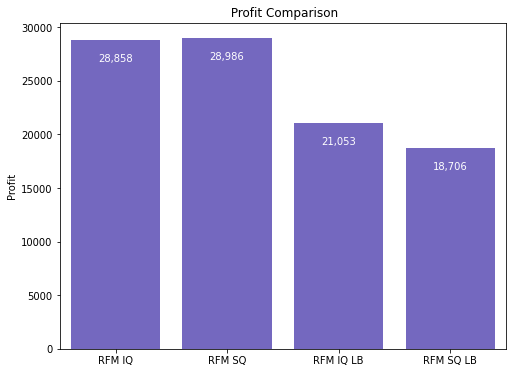

In [31]:
plt.figure(figsize=(8, 6))
fig = sns.barplot(x="name", y="Profit", color="slateblue", data=dat)
fig.set(xlabel="", ylabel="Profit", title=" Profit Comparison")
for index, row in dat.iterrows():
    fig.text(
        row.name, row.Profit - 2000, f"{int(row.Profit):,}", ha="center", color="white"
    )

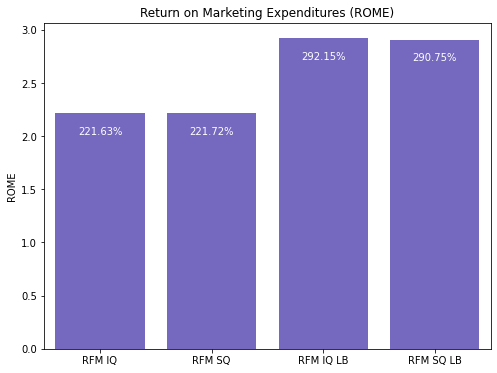

In [36]:
plt.figure(figsize=(8, 6))
fig = sns.barplot(x="name", y="ROME", color="slateblue", data=dat)
fig.set(xlabel="", ylabel="ROME", title="Return on Marketing Expenditures (ROME)")
for index, row in dat.iterrows():
    fig.text(
        row.name,
        row.ROME - 0.2,
        f"{round((100*row.ROME), 2):,}%",
        ha="center",
        color="white",
    )

In [18]:
#RFM Cells to target for all the 4 models
intuit_test['target_iq_cells']= np.where(intuit_test["rfm_iq"].isin(target_iq),1,0)
intuit_test['target_sq_cells']= np.where(intuit_test["rfm_sq"].isin(target_sq),1,0)
intuit_test['target_iq_lb_cells']= np.where(intuit_test["rfm_iq"].isin(target_lb_rfm_iq),1,0)
intuit_test['target_sq_lb_cells']= np.where(intuit_test["rfm_sq"].isin(target_lb_rfm_sq),1,0)

In [19]:
#Response rate per bin for iq
x= intuit_test.groupby('rfm_iq')['res1_yes'].agg(n_users="count", n_response=sum)
x['iq_response_rate']= x['n_response']/x['n_users']
intuit_test= intuit_test.merge(x['iq_response_rate'], on='rfm_iq')

In [20]:
#Response rate per bin for sq
x= intuit_test.groupby('rfm_sq')['res1_yes'].agg(n_users="count", n_response=sum)
x['sq_response_rate']= x['n_response']/x['n_users']
intuit_test= intuit_test.merge(x['sq_response_rate'], on='rfm_sq')

In [21]:
#Response rate per bin for lower iq
intuit_test= intuit_test.merge(intuit_lbiq[['prop_iq_lb','rfm_iq']], on='rfm_iq')

In [22]:
#Response rate per bin for lower sq
intuit_test= intuit_test.merge(intuit_lbsq[['prop_sq_lb','rfm_sq']], on='rfm_sq')

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative gains'>

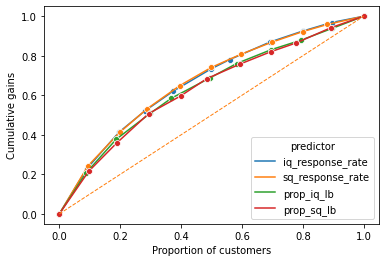

In [23]:
#Gains chart
rsm.gains_plot(df=intuit_test, rvar='res1_yes', lev=1, pred= ['iq_response_rate','sq_response_rate','prop_iq_lb','prop_sq_lb'], qnt=10, marker="o")

From the gains chart, we can see that RFM SQ has the highest deviation from the diagonal giving better gains than other models. Example- For a proportion of 10% users, RFM SQ will give a gains of 0.24 whereas SQ LB will give a gains of 0.2

<AxesSubplot:xlabel='Proportion of customers', ylabel='Profit'>

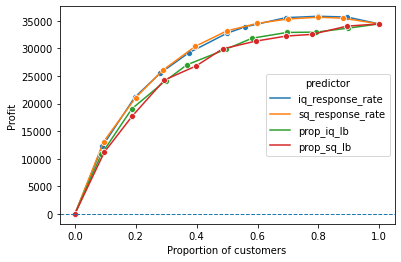

In [24]:
#Profit Curve
rsm.profit_plot(df=intuit_test, rvar='res1_yes', lev=1, pred= ['iq_response_rate','sq_response_rate','prop_iq_lb','prop_sq_lb'] ,qnt=10, cost=1.41, margin=60)

As we are targeting lesser number of people, for every proportion of users in LB we get lower profit than RFM IQ/SQ

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative lift'>

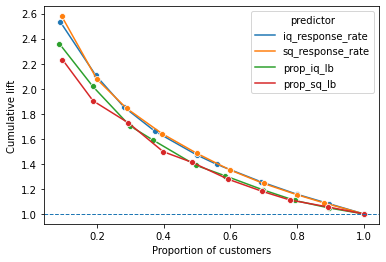

In [25]:
#Lift plot
rsm.lift_plot(df=intuit_test,rvar='res1_yes',lev=1,pred=['iq_response_rate','sq_response_rate','prop_iq_lb','prop_sq_lb'])

We get better lift from RFM SQ as compared to other models

<AxesSubplot:xlabel='Proportion of customers', ylabel='Return on Marketing Expenditures (ROME)'>

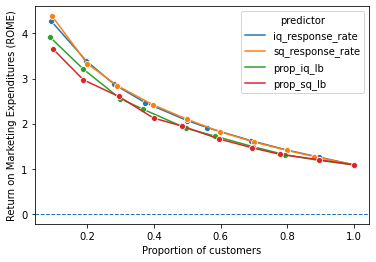

In [26]:
#ROME plot
rsm.ROME_plot(df=intuit_test,rvar='res1_yes',lev=1,pred=['iq_response_rate','sq_response_rate','prop_iq_lb','prop_sq_lb'], cost=1.41,margin=60)

From the overall analysis, we see that RFM SQ is the best model and we will compare this model with other logistic and NN models to decide the best model

In [35]:
#Subsetting the response rate and IDs for Sequential RFM that we will use for comparison later 
df_rfm= intuit_test[['id', 'sq_response_rate']]

# Logistic Regression

In [44]:
cost= 1.41
margin= 60
breakeven_rr= cost/margin

In [45]:
intuit75k_copy = intuit75k.copy(deep = True)

We standardise the numeric data.

In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
sf = scaler.fit(intuit75k[['numords','dollars','last','sincepurch']])
intuit75k_copy[['numords','dollars','last','sincepurch']] = sf.transform(intuit75k_copy[['numords','dollars','last','sincepurch']])

In [47]:
intuit75k_copy.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,res1_yes,responsive_bin,version_status,rec_iq,freq_iq,mon_iq,rfm_iq,freq_sq,mon_sq,rfm_sq
0,1,94553,18,Male,0,-0.061449,0.202116,-1.136223,-0.364760,0,...,0,NRes_ZIP_bin,BoughtV2_CurrentV2,1,3,2,132,4,2,142
1,2,53190,10,Unknown,0,-0.867026,-0.290463,-1.241056,-1.262404,0,...,0,NRes_ZIP_bin,BoughtV2_CurrentV2,1,5,3,153,5,2,152
2,3,37091,8,Male,0,1.549704,-0.001073,-0.192728,1.330790,0,...,0,NRes_ZIP_bin,BoughtV1_CurrentV2,3,1,2,312,1,5,315
3,4,02125,1,Male,0,-0.867026,-0.875400,0.121771,-1.461881,0,...,0,Res_ZIP_bin,BoughtV2_CurrentV2,3,5,5,355,5,4,354
4,5,60201,11,Male,0,-0.867026,-0.844613,-1.450722,-1.262404,0,...,0,NRes_ZIP_bin,BoughtV2_CurrentV2,1,5,5,155,5,4,154


In [48]:
# Logistic regression via statsmodel (using the formula API)
lr_mod = smf.glm(
    formula="res1_yes ~ responsive_bin + numords + dollars + last +  owntaxprod + version_status",
    family=Binomial(link=logit()),
    data=intuit75k_copy[intuit75k_copy.training == 1]
)
lr = lr_mod.fit()

########################################################################################
lr_mod1 = smf.glm(
    formula="res1_yes ~ responsive_bin + numords + dollars + last +  owntaxprod + upgraded*sincepurch",
    family=Binomial(link=logit()),
    data=intuit75k_copy[intuit75k_copy.training == 1]
)
lr1 = lr_mod1.fit()

#########################################################################################
lr_mod2 = smf.glm(
    formula="res1_yes ~ zip_bins +  numords + dollars + last +  owntaxprod + upgraded:sincepurch  + version_status",
    family=Binomial(link=logit()),
    data=intuit75k_copy[intuit75k_copy.training == 1]
)
lr2 = lr_mod2.fit()

###########################################################################################
lr_mod3 = smf.glm(
    formula="res1_yes ~ responsive_bin + rfm_iq +  owntaxprod + version_status",
    family=Binomial(link=logit()),
    data=intuit75k_copy[intuit75k_copy.training == 1]
)
lr3 = lr_mod3.fit()


In [49]:
rsm.vif(lr_mod)

,variable,vif,Rsq
0,version_status[T.BoughtV1_CurrentV2],1.583,0.368
1,version_status[T.BoughtV2_CurrentV2],1.570,0.363
2,numords,1.558,0.358
3,dollars,1.527,0.345
4,owntaxprod,1.027,0.026
5,last,1.017,0.017
6,responsive_bin[T.Res_ZIP_bin],1.000,0.000


In [50]:
lr.wald_test_terms().table.round(3)

,statistic,pvalue,df_constraint
Intercept,5134.373,0.000,1
responsive_bin,1357.593,0.000,1
version_status,436.235,0.000,2
numords,145.441,0.000,1
dollars,15.926,0.000,1
last,327.220,0.000,1
owntaxprod,8.717,0.003,1


In [51]:
# making chnages to push
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               res1_yes   No. Observations:                52500
Model:                            GLM   Df Residuals:                    52492
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8915.4
Date:                Thu, 11 Feb 2021   Deviance:                       17831.
Time:                        03:31:31   Pearson chi2:                 5.14e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -3.0649      0.043    -71.655      0.000      -3.149      -2.981
responsive_bin[T.Res_ZIP_bin]            2.0226      0.055     36.846      0.000       1.915       2.130
version_status[T.BoughtV1_CurrentV2]     0.2157      0.056      3.880      0.000       0.107       0.325
version_status[T.BoughtV2_CurrentV2]    -0.7784      0.053    -14.785      0.000      -0.882      -0.675
numords                                  0.2855      0.024     12.060      0.000       0.239       0.332
dollars                                  0.0883      0.022      3.991      0.000       0.045       0.132
last                                    -0.4175      0.023    -18.089      0.000      -0.463      -0.372
owntaxprod                               0.3034      0.103      2.952      0.003       0.102       0.505
========================================================================================================
"""

In [52]:
rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%
1,responsive_bin[T.Res_ZIP_bin],7.558,655.759%,6.787,8.416
2,version_status[T.BoughtV1_CurrentV2],1.241,24.074%,1.113,1.384
3,version_status[T.BoughtV2_CurrentV2],0.459,-54.086%,0.414,0.509
4,numords,1.330,33.045%,1.270,1.394
5,dollars,1.092,9.235%,1.046,1.141
6,last,0.659,-34.129%,0.630,0.689
7,owntaxprod,1.354,35.448%,1.107,1.657


In [53]:
rsm.model_fit(lr)


Pseudo R-squared (LR): 0.112
Pseudo R-squared (McFadden): 0.112
Log-likelihood: -8915.405, AIC: 17846.81, BIC: 17917.759
Chi-squared: 51395.168 df(7), p.value < 0.001 
Nr obs: 52,500



<AxesSubplot:xlabel='Odds-ratio'>

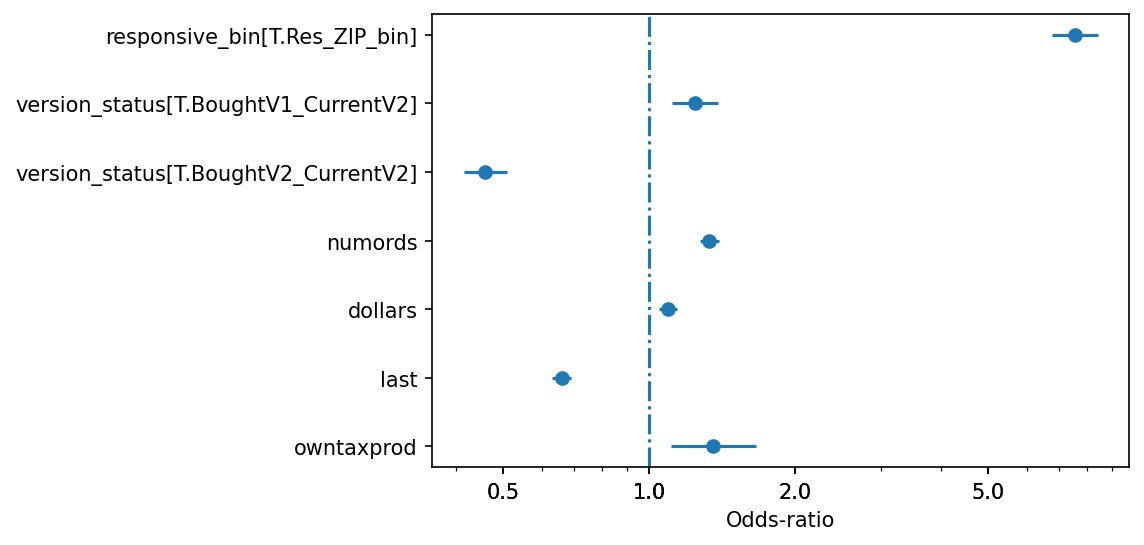

In [54]:
rsm.or_plot(lr)

In [55]:
def add_predict_col(df_pred,df2_concat, lr, colsuffix, breakeven):
    predicted = lr.predict(df_pred)/2
    df2_concat['predicted_'+colsuffix] = predicted
    df2_concat['predicted_yes_'+colsuffix] = np.where(df2_concat['predicted_'+colsuffix] > breakeven, 1, 0)
    return df2_concat

In [56]:
def create_cm_roc_profit(df, pred_col, pred_col_prob):
    confusion_matrix = pd.crosstab(df[df.training == 0]['res1_yes'], df[df.training == 0][pred_col])
    
    accuracy = (confusion_matrix[1][1] + confusion_matrix[0][0])/confusion_matrix.values.sum()
    f1 = 2*confusion_matrix[1][1]/(2*confusion_matrix[1][1] + confusion_matrix[1][0] + confusion_matrix[0][1])
    roc_score = roc_auc_score(df[df.training == 0]['res1_yes'], df[df.training == 0][pred_col])
    
    profit = rsm.profit_max(df[df.training == 0], 'res1_yes',1 ,pred_col_prob,1.41,60)
    
    print("Accuracy is {}".format(accuracy))
    print("F1 Score is {}".format(f1))
    print("ROC AUC is {}".format(roc_score))
    print("Profit is {}".format(profit))
    return roc_score,profit,confusion_matrix
    

In [57]:
intuit75k = add_predict_col(intuit75k_copy, intuit75k, lr, 'lr', breakeven_rr)
intuit75k = add_predict_col(intuit75k_copy, intuit75k, lr1, 'lr1', breakeven_rr)
intuit75k = add_predict_col(intuit75k_copy, intuit75k, lr2, 'lr2', breakeven_rr)
intuit75k = add_predict_col(intuit75k_copy, intuit75k, lr3, 'lr3', breakeven_rr)

In [60]:
roc_lr, profit_lr, cm_lr = create_cm_roc_profit(intuit75k, 'predicted_yes_lr', 'predicted_lr')
cm_lr

Accuracy is 0.7064888888888889
F1 Score is 0.1858974358974359
ROC AUC is 0.6956297539783561
Profit is 35357.31


predicted_yes_lr,0,1
res1_yes,,
0,15142,6255
1,349,754


In [61]:
roc_lr1, profit_lr1, cm_lr1 = create_cm_roc_profit(intuit75k, 'predicted_yes_lr1', 'predicted_lr1')
cm_lr1

Accuracy is 0.7081333333333333
F1 Score is 0.18614450365596727
ROC AUC is 0.6952045369812521
Profit is 35237.94


predicted_yes_lr1,0,1
res1_yes,,
0,15182,6215
1,352,751


In [62]:
roc_lr2, profit_lr2, cm_lr2 = create_cm_roc_profit(intuit75k, 'predicted_yes_lr2', 'predicted_lr2')
cm_lr2

Accuracy is 0.7095111111111111
F1 Score is 0.18584952665670154
ROC AUC is 0.6937792306231151
Profit is 34995.75


predicted_yes_lr2,0,1
res1_yes,,
0,15218,6179
1,357,746


In [63]:
roc_lr3, profit_lr3, cm_lr3 = create_cm_roc_profit(intuit75k, 'predicted_yes_lr3', 'predicted_lr3')
cm_lr3

Accuracy is 0.7168444444444444
F1 Score is 0.18809736204919078
ROC AUC is 0.6941953801659437
Profit is 34770.96


predicted_yes_lr3,0,1
res1_yes,,
0,15391,6006
1,365,738


In [64]:
peformance_df = pd.DataFrame({'model':['lr','lr1','lr2','lr3'],'profit':[profit_lr,profit_lr1,profit_lr2,profit_lr3],'ROC_AUC_Score':[roc_lr,roc_lr1,roc_lr2,roc_lr3]})
peformance_df

,model,profit,ROC_AUC_Score
0,lr,35357.31,0.695630
1,lr1,35237.94,0.695205
2,lr2,34995.75,0.693779
3,lr3,34770.96,0.694195


<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative gains'>

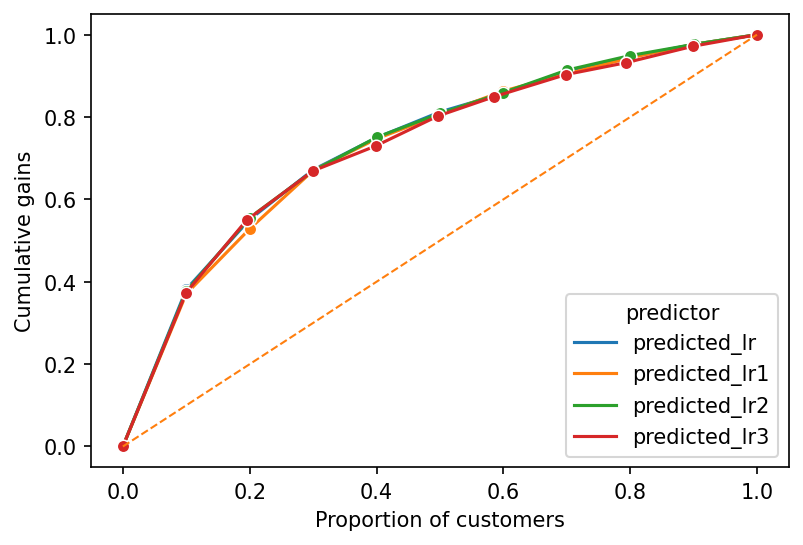

In [65]:
rsm.gains_plot(intuit75k[intuit75k.training == 0], 'res1_yes', 1, pred = ['predicted_lr','predicted_lr1','predicted_lr2','predicted_lr3'])


<AxesSubplot:xlabel='Proportion of customers', ylabel='Profit'>

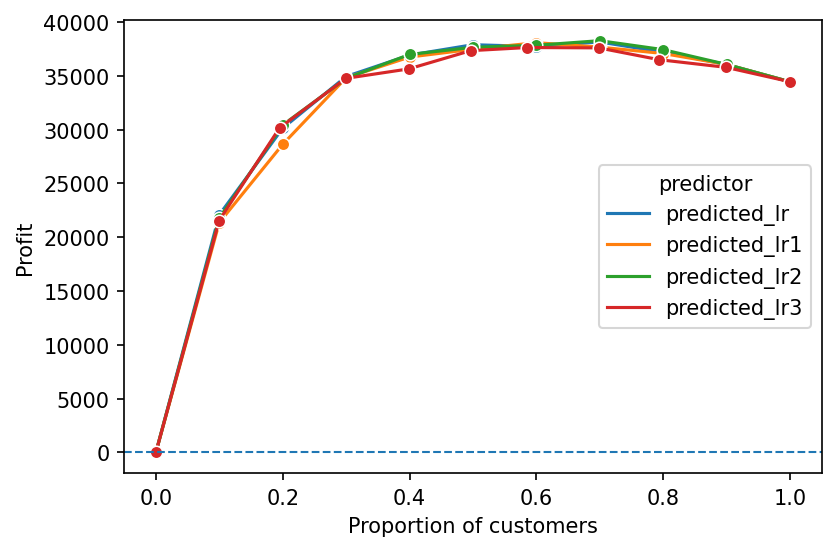

In [66]:
rsm.profit_plot(df=intuit75k[intuit75k.training == 0],rvar='res1_yes',lev=1,pred=['predicted_lr','predicted_lr1','predicted_lr2','predicted_lr3'],cost=1.41,margin=60)


<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative lift'>

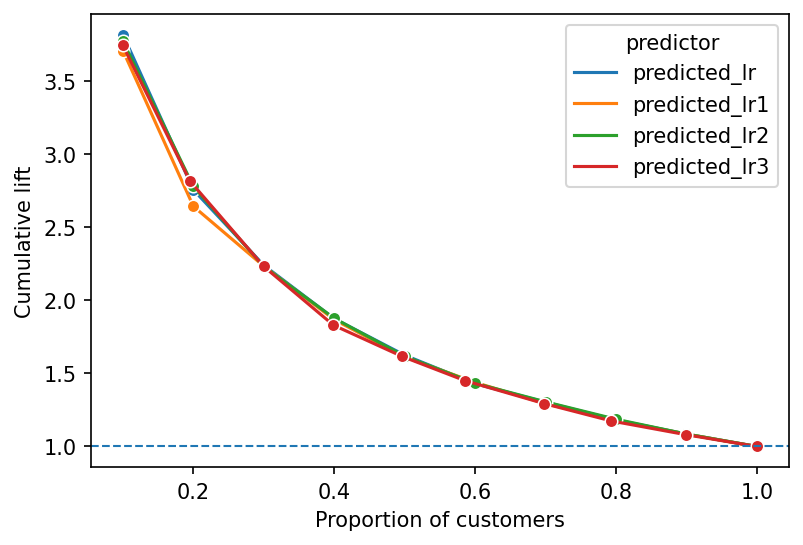

In [67]:
rsm.lift_plot(df=intuit75k[intuit75k.training == 0],rvar='res1_yes',lev=1,pred=['predicted_lr','predicted_lr1','predicted_lr2','predicted_lr3'])


<AxesSubplot:xlabel='Proportion of customers', ylabel='Return on Marketing Expenditures (ROME)'>

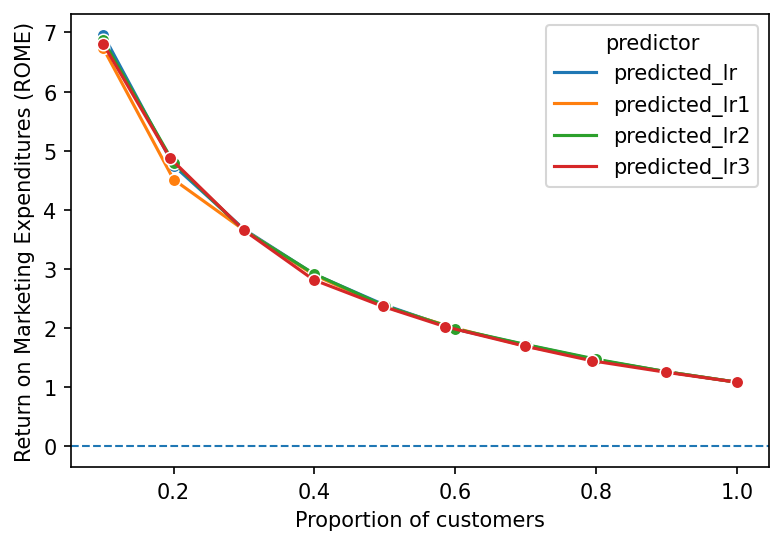

In [68]:
rsm.ROME_plot(df=intuit75k[intuit75k.training == 0],rvar='res1_yes',lev=1,pred=['predicted_lr','predicted_lr1','predicted_lr2','predicted_lr3'], cost=1.41,margin=60)


In [69]:
prop_reached = sum(intuit75k[intuit75k.training == 0]['predicted_yes_lr'])/len(intuit75k[intuit75k.training == 0])
prop_reached

0.3115111111111111

In [70]:
response_rate = np.mean(intuit75k[(intuit75k.predicted_yes_lr == 1) & (intuit75k.training == 0)]['res1_yes'])
response_rate

0.10757597374803823

In [71]:
total_biz = 801821
already_resp = 38487
population = total_biz - already_resp
targets = population * prop_reached
responses = targets * response_rate

In [72]:
cost = targets * 1.41
rev = responses * 60
profit = rev - cost
profit

1199530.527624

In [75]:
df_logit = intuit75k[intuit75k.training == 0][['id','predicted_lr']]
df_logit.rename(columns = {'predicted_lr':'prediction_logit'}, inplace = True)
df_logit

,id,prediction_logit
1,2,0.013319
2,3,0.044481
4,5,0.013828
6,7,0.018923
8,9,0.008095
...,...,...
74981,74982,0.010084
74982,74983,0.006440
74987,74988,0.048365
74993,74994,0.071338


# Neural Networks

### Tranformation of data and setting up the Neural Network

- For optimum performance, the data that we input into neural networks should be standardized. Hence we standardize all the numeric inputs before feeding them into the model.
- Categorical variables with two classes need not be transformed. However, categorical variables with more than two classes need to be encoded using one hot encoding before feeding them into the model.
- The beauty of Neural Networks is that they reduce the need for feature engineering to a large extent. It always advisable to pick features for your model based on domain knowledge. However, even if this isn't feasible, a neural network is efficient is picking up inherent patterns in the data and hence will adjust weights for a feature based on its impact.
- We have decided to use 'zip_bins' as a categorical variable instead of 'zip' in our model.
- 'id' has also been dropped as it does not  contribute to the model.

In [76]:
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)

In [77]:
# Standardization

scaler = preprocessing.StandardScaler()
sf = scaler.fit(intuit75k.query('training==1')[['numords','dollars','last','sincepurch']])
intuit75k[['numords','dollars','last','sincepurch']] = sf.transform(intuit75k[['numords','dollars','last','sincepurch']])

In [78]:
# One hot encoding

intuit75k = intuit75k.join(pd.get_dummies(intuit75k.sex), how='inner')
intuit75k = intuit75k.join(pd.get_dummies(intuit75k.zip_bins), how='inner')

In [9]:
intuit_train = intuit75k.query('training == 1').reset_index()
intuit_val = intuit75k.query('training == 0').reset_index()

In [10]:
intuit_train.dtypes

index            int64
id               int32
zip             object
zip_bins         int32
sex           category
bizflag          int32
numords        float64
dollars        float64
last           float64
sincepurch     float64
version1         int32
owntaxprod       int32
upgraded         int32
res1          category
training         int32
res1_yes         int64
Female           uint8
Male             uint8
Unknown          uint8
1                uint8
2                uint8
3                uint8
4                uint8
5                uint8
6                uint8
7                uint8
8                uint8
9                uint8
10               uint8
11               uint8
12               uint8
13               uint8
14               uint8
15               uint8
16               uint8
17               uint8
18               uint8
19               uint8
20               uint8
dtype: object

In [11]:
X_train = intuit_train.drop(columns=['id','zip', 'zip_bins','res1','res1_yes','training','sex','index'])
y_train = intuit_train[['res1_yes']]
X_test = intuit_val.drop(columns=['id','zip', 'zip_bins','res1','res1_yes','training','sex','index'])
y_test = intuit_val[['res1_yes']]

### Neural Network Model 1

- For the first neural network model, we chose 3 hidden layers with 100 nodes each. We chose 'tanh' as our activation function and adam as our solver.

In [12]:
clf_1 = MLPClassifier(random_state=123, activation='tanh', solver='adam', max_iter=3000, hidden_layer_sizes = (100,100,100)).fit(X_train, y_train.values.ravel())

In [13]:
# Prediction probabilities on the test set
pred = clf_1.predict_proba(X_test)
probs = pd.Series([p[1] for p in pred])

# Prediction probabilities on the train set
pred_train = clf_1.predict_proba(X_train)
probs_train = pd.Series([p[1] for p in pred_train])

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.res1_yes, pred[:,1])
print(f'Test data auc is {metrics.auc(fpr,tpr)}')

Test data auc is 0.6163136171426749


In [15]:
fpr, tpr, thresholds = metrics.roc_curve(y_train.res1_yes, pred_train[:,1])
print(f'Train data auc is {metrics.auc(fpr,tpr)}')

Train data auc is 0.9997984308009585


In [16]:
breakeven = 1.41/60

In [17]:
# Profit calculation on test data

pred_prof = pd.Series((probs/2)) 
pred_prof.name = 'predictions_model_1_test'

pred_prof_train = pd.Series((probs_train/2))
pred_prof_train.name = 'predictions_model_1_train'

df_test = y_test.join(pred_prof, how='inner')
df_train = y_train.join(pred_prof_train, how='inner')

In [18]:
df_test

,res1_yes,predictions_model_1_test
0,0,3.224312e-05
1,0,2.501738e-08
2,0,6.676777e-03
3,0,8.324650e-09
4,0,5.649750e-11
...,...,...
22495,0,6.936462e-09
22496,0,6.731326e-11
22497,0,1.504177e-05
22498,1,1.484497e-04


In [19]:
p = profit_max(df_test,'res1_yes',1,'predictions_model_1_test',1.41,60)

print(f'The profit for {clf_1} on the test data is ${p}')

The profit for MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100),
              max_iter=3000, random_state=123) on the test data is $9637.77


In [20]:
# Confusion Matrix

TP, FP, TN, FN, contact = confusion(df_test,'res1_yes',1,'predictions_model_1_test',1.41,60)

print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

TP: 203
TN: 19797
FP: 1600
FN: 900


In [21]:
a = ((probs/2) > breakeven).astype(int)
a_train = ((probs_train/2) > breakeven).astype(int)

In [22]:
acc = np.mean(a == y_test['res1_yes'])
print(f'Test data accuracy {acc}')

Test data accuracy 0.8888888888888888


In [23]:
acc_train = np.mean(a_train == y_train['res1_yes'])
print(f'Train data accuracy {acc_train}')

Train data accuracy 0.9854285714285714


In [24]:
print(f'Minimum Loss is {min(clf_1.loss_curve_)}')

Minimum Loss is 0.011887956499040411


In [25]:
l = clf_1.loss_curve_
x = list(range(clf_1.n_iter_))

In [26]:
dat = pd.DataFrame({'Loss':l,'Epoch':x})

<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

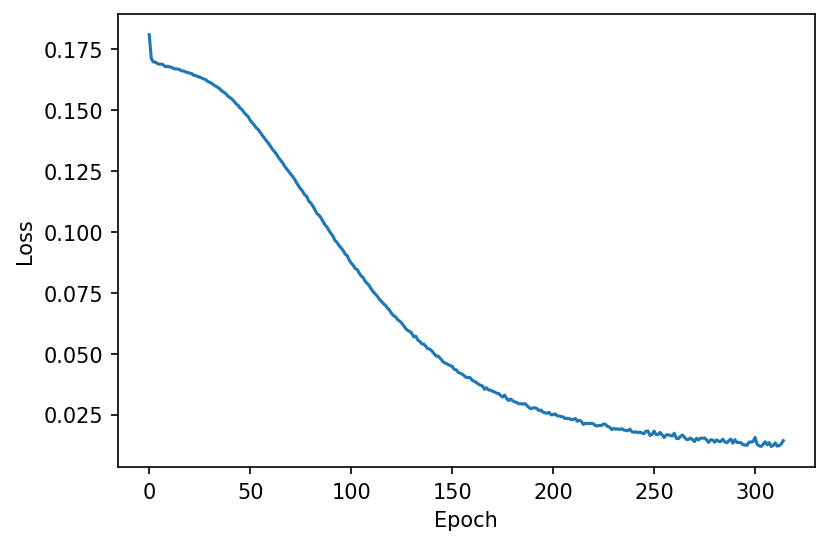

In [27]:
sns.lineplot(x = "Epoch",y = "Loss", data = dat)

After running an initial analysis on this model, these were our findings:
- The auc score for this model on test data was satisfactory but the auc score on the training data was exceptionally high. This is very convincing proof of overfitting.
- The accuracy score was also very high on the train which further pushes our argument that this model has been overfit on the training data.
- Hence this model is definitely not robust and may perform poorly on data that is foreign to the model.

### Grid Search Cross-Validation to arrive at the best model

We use Grid Search Cross Validation to help us arrive at the best possible neural network model for our use case. This is a brute force method which uses every combination of hyper parameters to get the best model.

In [28]:
mlp = MLPClassifier(random_state=123,max_iter=1000)

In [29]:
parameter_space = {
    'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (1,1,1), (2,2,2), (3,3,3), (4,4,4), (5,5,5), (6,6,6), (7,7,7)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'learning_rate': ['adaptive','constant'],
}

In [30]:
# Cross validation switch

cv = False

In [31]:
if cv:
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, scoring='roc_auc', verbose=4)
    clf.fit(X_train, y_train.values.ravel())

### Neural Network Model 2

Our second model uses the hyper parameters suggested by the Grid Search algorithm to set the model. We will again train the model on the same data set as model 1.

In [33]:
# Training model using the parameters selected by CV above

clf_2 = MLPClassifier(random_state=123, activation='relu', solver='adam', max_iter=1000, hidden_layer_sizes = (3,3), learning_rate='adaptive').fit(X_train, y_train.values.ravel())

In [34]:
# Prediction probabilities on the test set
pred = clf_2.predict_proba(X_test)
probs = pd.Series([p[1] for p in pred])

# Prediction probabilities on the train set
pred_train = clf_2.predict_proba(X_train)
probs_train = pd.Series([p[1] for p in pred_train])

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.res1_yes, pred[:,1])
print(f'Test data auc is {metrics.auc(fpr,tpr)}')

Test data auc is 0.7537063537135102


In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_train.res1_yes, pred_train[:,1])
print(f'Train data auc is {metrics.auc(fpr,tpr)}')

Train data auc is 0.7559930268922149


In [37]:
breakeven = 1.41/60

In [38]:
# Profit calculation on train set

pred_prof = pd.Series((probs/2)) 
pred_prof.name = 'predictions_model_2_test'

pred_prof_train = pd.Series((probs_train/2))
pred_prof_train.name = 'predictions_model_2_train'

df_test = df_test.join(pred_prof, how='inner')
df_train = df_train.join(pred_prof_train, how='inner')

In [39]:
df_test

,res1_yes,predictions_model_1_test,predictions_model_2_test
0,0,3.224312e-05,0.010613
1,0,2.501738e-08,0.047164
2,0,6.676777e-03,0.012809
3,0,8.324650e-09,0.017358
4,0,5.649750e-11,0.007661
...,...,...,...
22495,0,6.936462e-09,0.010933
22496,0,6.731326e-11,0.007028
22497,0,1.504177e-05,0.046599
22498,1,1.484497e-04,0.072720


In [40]:
p = profit_max(df_test,'res1_yes',1,'predictions_model_2_test',1.41,60)

print(f'The profit for {clf_2} on the test data is ${p}')

The profit for MLPClassifier(hidden_layer_sizes=(3, 3), learning_rate='adaptive',
              max_iter=1000, random_state=123) on the test data is $35510.67


In [41]:
# Confusion Matrix

TP, FP, TN, FN, contact = confusion(df_test,'res1_yes',1,'predictions_model_2_test',1.41,60)

print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

TP: 759
TN: 15043
FP: 6354
FN: 344


In [42]:
a = ((probs/2) > breakeven).astype(int)
a_train = ((probs_train/2) > breakeven).astype(int)

In [43]:
acc = np.mean(a == y_test['res1_yes'])
print(f'Test data accuracy {acc}')

Test data accuracy 0.7023111111111111


In [44]:
acc_train = np.mean(a_train == y_train['res1_yes'])
print(f'Train data accuracy {acc_train}')

Train data accuracy 0.6997333333333333


In [45]:
print(f'Minimum Loss is {min(clf_2.loss_curve_)}')

Minimum Loss is 0.16945831813773668


In [46]:
l = clf_2.loss_curve_
x = list(range(clf_2.n_iter_))

In [47]:
df = pd.DataFrame({'Loss':l,'Epoch':x})

<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

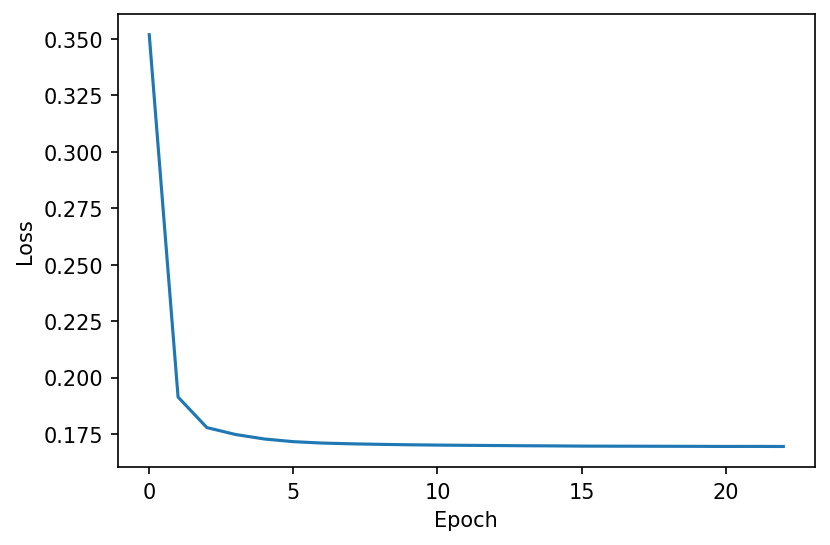

In [48]:
sns.lineplot(x = "Epoch",y = "Loss", data = df)

After running an initial analysis on this model, these were our findings:
- We can see that the minimum loss of model 1 is lower than that of model 2. This may indicate that model 1 is better.
- The auc scores of the model on both training and test data is great. It falls in the satisfactory range of 0.6-0.8 . The auc score on the training data is not exceptionally high indicating that the model is not suffering from over-fitting and is hence robust.

### Comparing the two Neural Network Models

<AxesSubplot:xlabel='Proportion of customers', ylabel='Profit'>

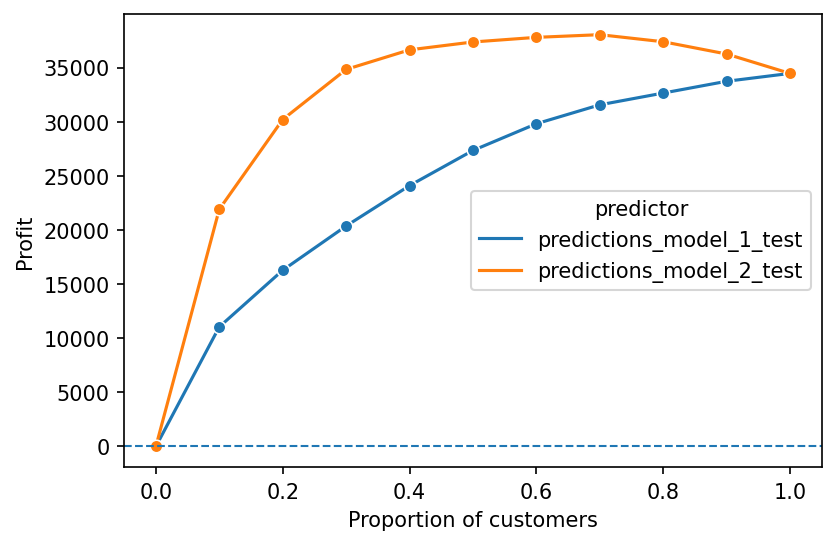

In [49]:
# Profit plot

profit_plot(df=df_test,rvar='res1_yes',lev=1,pred=['predictions_model_1_test','predictions_model_2_test'],cost=1.41,margin=60)

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative gains'>

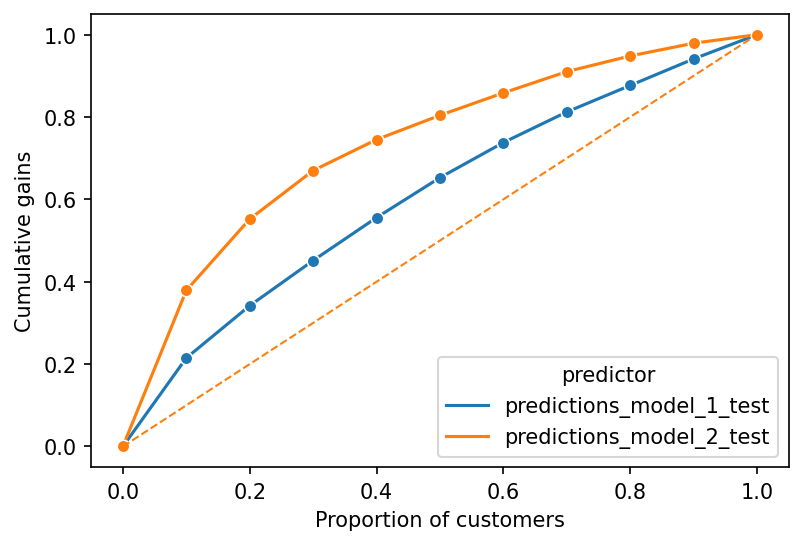

In [50]:
# Gains plot

gains_plot(df=df_test,rvar='res1_yes',lev=1,pred=['predictions_model_1_test','predictions_model_2_test'])

<AxesSubplot:xlabel='Proportion of customers', ylabel='Cumulative lift'>

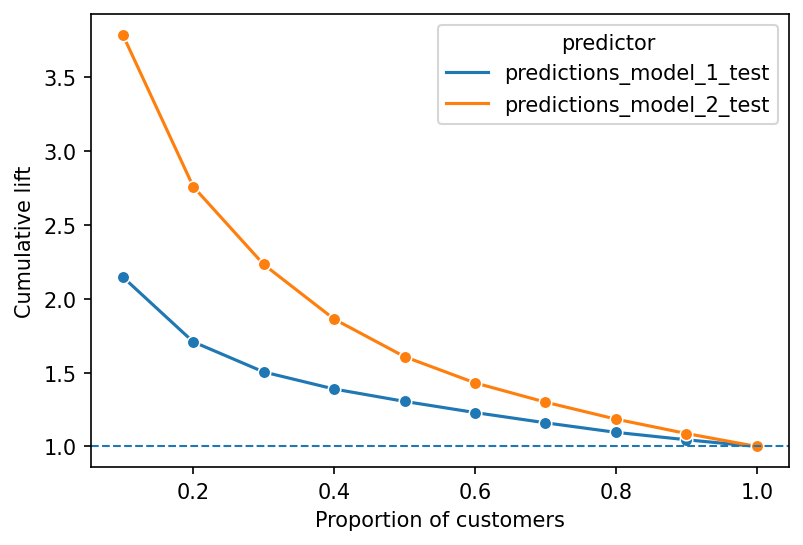

In [51]:
# Lift plot

lift_plot(df=df_test,rvar='res1_yes',lev=1,pred=['predictions_model_1_test','predictions_model_2_test'])

<AxesSubplot:xlabel='Proportion of customers', ylabel='Return on Marketing Expenditures (ROME)'>

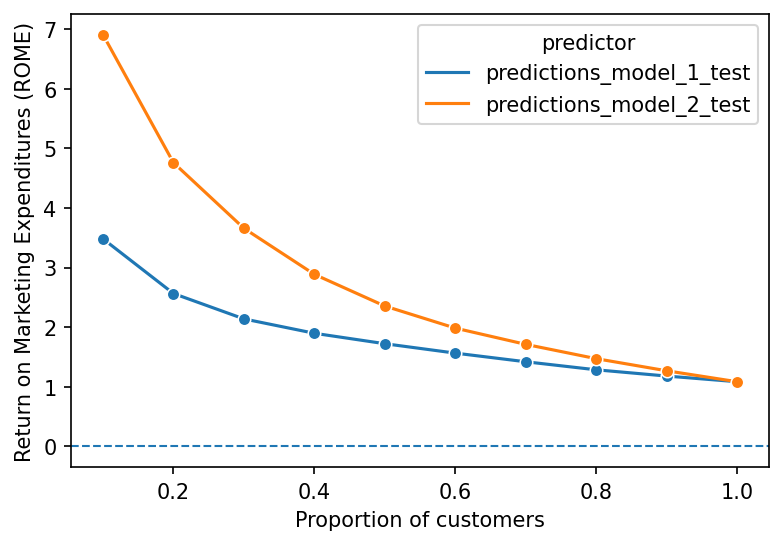

In [52]:
# ROME plot

ROME_plot(df=df_test,rvar='res1_yes',lev=1,pred=['predictions_model_1_test','predictions_model_2_test'], cost=1.41,margin=60)

- There is significant amount of daylight between model 1 and model 2 in both the profit and the gains plots. Model 2 sits well above model 1 and hence it is clearly the superior model.
- The lift and ROME plots also tell a similar story. Model 2 performs significantly better on both fronts, sitting well above model 1.
- The profit that we expect from the IDs of customers targeted by model 2 is much higher as compared to that of model 1.

##### Hence model 2 will our preferred choice for a neural network.